# Watkins’s Q(λ)
> Backward View of TD(λ) by Q-Learning

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

In [2]:
env_name = "Taxi-v3"
epsilon = 1
decay_rate = 0.001
min_epsilon = 0.01
max_episodes = 2500
print_interval = 100
test_episodes = 3
lr = 0.6
gamma = 0.9
lam = 0.9

In [3]:
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
print(f"Number of states: {n_states}\n"
      f"Number of actions: {n_actions}")

Number of states: 500
Number of actions: 6


In [4]:
q_table = e_table = np.zeros((n_states, n_actions))

In [5]:
def choose_action(state):
    global q_table
    if epsilon > np.random.uniform():
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state, :])
    return action

## pseudocode
> <p align="center">
  <img src="q_lambda_psuedocode.png" width=640>
  </p> 

In [6]:
running_reward = []
for episode in range(1, 1 + max_episodes):
    state = env.reset()
    done = False  
    episode_reward = 0
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        next_action = choose_action(next_state)
        
        optimal_next_action = np.argmax(q_table[next_state, :])
        delta = reward + gamma * q_table[next_state, optimal_next_action] * (1 - done) - q_table[state, action]
        e_table[state, action] += 1
        
        q_table = q_table + lr * delta * e_table
        
        if next_action == optimal_next_action:
            e_table = gamma * lam * e_table
        else:
            e_table = np.zeros((n_states, n_actions))                
                
        episode_reward += reward

        state = next_state
        action = next_action
            
    epsilon  = epsilon - decay_rate if epsilon - decay_rate > min_epsilon else min_epsilon
    
    if episode == 1:
        running_reward.append(episode_reward)
    else:
        running_reward.append(0.99 * running_reward[-1] + 0.01 * episode_reward)
    if episode % print_interval == 0:
        print(f"Ep:{episode}| "
              f"Ep_reward:{episode_reward}| "
              f"Running_reward:{running_reward[-1]:.3f}| "
             f"Epsilon:{epsilon:.3f}| ")

Ep:100| Ep_reward:-560| Running_reward:-765.268| Epsilon:0.900| 
Ep:200| Ep_reward:-542| Running_reward:-654.988| Epsilon:0.800| 
Ep:300| Ep_reward:-103| Running_reward:-456.891| Epsilon:0.700| 
Ep:400| Ep_reward:-95| Running_reward:-263.715| Epsilon:0.600| 
Ep:500| Ep_reward:-53| Running_reward:-160.090| Epsilon:0.500| 
Ep:600| Ep_reward:-38| Running_reward:-93.138| Epsilon:0.400| 
Ep:700| Ep_reward:-8| Running_reward:-48.458| Epsilon:0.300| 
Ep:800| Ep_reward:-11| Running_reward:-26.239| Epsilon:0.200| 
Ep:900| Ep_reward:4| Running_reward:-12.263| Epsilon:0.100| 
Ep:1000| Ep_reward:9| Running_reward:-0.845| Epsilon:0.010| 
Ep:1100| Ep_reward:15| Running_reward:4.571| Epsilon:0.010| 
Ep:1200| Ep_reward:11| Running_reward:5.925| Epsilon:0.010| 
Ep:1300| Ep_reward:-2| Running_reward:6.422| Epsilon:0.010| 
Ep:1400| Ep_reward:6| Running_reward:7.016| Epsilon:0.010| 
Ep:1500| Ep_reward:7| Running_reward:7.143| Epsilon:0.010| 
Ep:1600| Ep_reward:7| Running_reward:7.507| Epsilon:0.010| 
Ep:1

Text(0.5, 1.0, 'Running_reward')

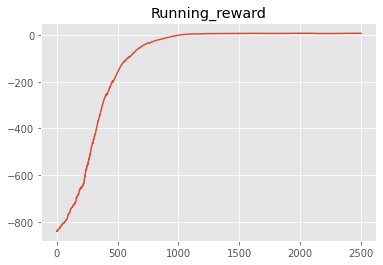

In [7]:
plt.figure()
plt.style.use("ggplot")
plt.plot(np.arange(max_episodes), running_reward)
plt.title("Running_reward")

In [11]:
for episode in range(1, 1 + test_episodes):
    state = env.reset()
    done = False  
    episode_reward = 0
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        env.render()
        clear_output(wait=True)
        sleep(0.2)
        episode_reward += reward
        state = next_state

    print(f"Ep:{episode}| "
          f"Ep_reward:{episode_reward}| ")

Ep:3| Ep_reward:8| 


## Demo
<p align="center">
  <img src="q_lambda.gif" width=200>
</p> 